## 0. Introduction

Titanic - Machine Learning from Disaster

The sinking of the Titanic is one of the most infamous shipwrecks in history.

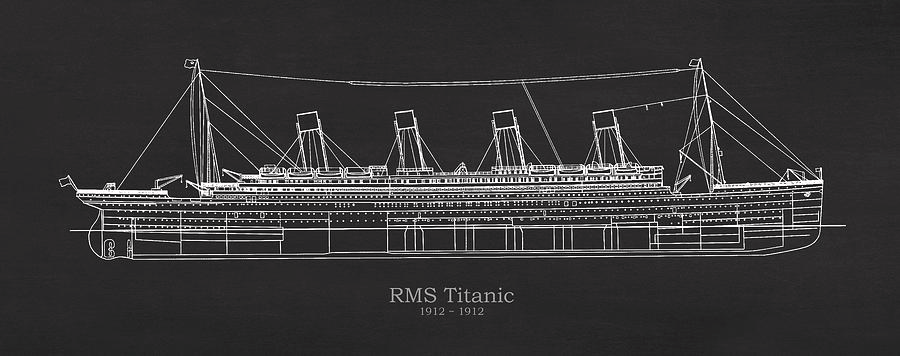

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. 
Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, et


## 1. Import Libraries


In [1]:
# Data wrangling

import numpy as np 
import pandas as pd
import os

# Data visualization
import matplotlib.pyplot as plt
plt.style.use("bmh")
%matplotlib inline
import seaborn as sns
import missingno as msno
import plotly.express as px

# Machine learnin

from sklearn.model_selection import train_test_split
from sklearn.metrics import  confusion_matrix,f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Hide warnings

import warnings
warnings.simplefilter('ignore')

## 2. Exploratory Data Analysis

In [2]:
# Set the path

PATH="../input/titanic"
os.listdir(PATH)

['train.csv', 'test.csv', 'gender_submission.csv']

In [3]:
# Loading the data

df_train=pd.read_csv(f'{PATH}/train.csv')
df_test=pd.read_csv(f'{PATH}/test.csv')
df = pd.concat([df_train,df_test])

In [4]:
df_train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
182,183,0,3,"Asplund, Master. Clarence Gustaf Hugo",male,9.00,4,2,347077,31.3875,NaN,S
306,307,1,1,"Fleming, Miss. Margaret",female,NaN,0,0,17421,110.8833,NaN,C
415,416,0,3,"Meek, Mrs. Thomas (Annie Louise Rowley)",female,NaN,0,0,343095,8.0500,NaN,S
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
231,232,0,3,"Larsson, Mr. Bengt Edvin",male,29.00,0,0,347067,7.7750,NaN,S


In [5]:
df_train.shape

(891, 12)

In [6]:
df_test.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
112,1004,1,"Evans, Miss. Edith Corse",female,36.0,0,0,PC 17531,31.6792,A29,C
215,1107,1,"Head, Mr. Christopher",male,42.0,0,0,113038,42.5000,B11,S
10,902,3,"Ilieff, Mr. Ylio",male,NaN,0,0,349220,7.8958,NaN,S
33,925,3,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
48,940,1,"Bucknell, Mrs. William Robert (Emma Eliza Ward)",female,60.0,0,0,11813,76.2917,D15,C


In [7]:
df_test.shape

(418, 11)

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [10]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 3. Data visualization

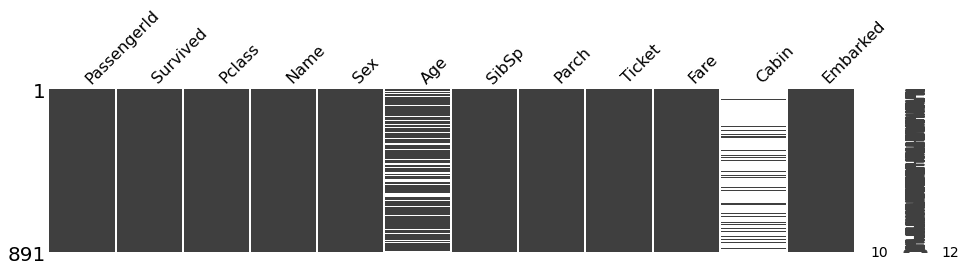

In [11]:
msno.matrix(df_train,figsize=(16,3))
plt.show()

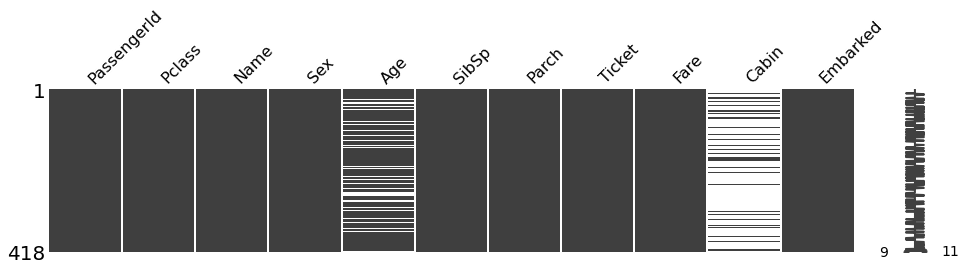

In [12]:
msno.matrix(df_test,figsize=(16,3))
plt.show()

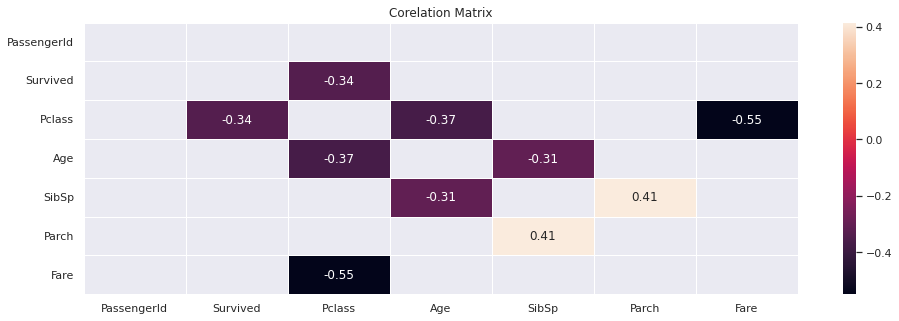

In [13]:
sns.set(rc={'figure.figsize':(16,5)})
corr = df_train.corr()
sns.heatmap(corr[((corr >= 0.3) | (corr <= -0.3)) & (corr != 1)], annot=True, linewidths=.5, fmt= '.2f')
plt.title('Corelation Matrix');

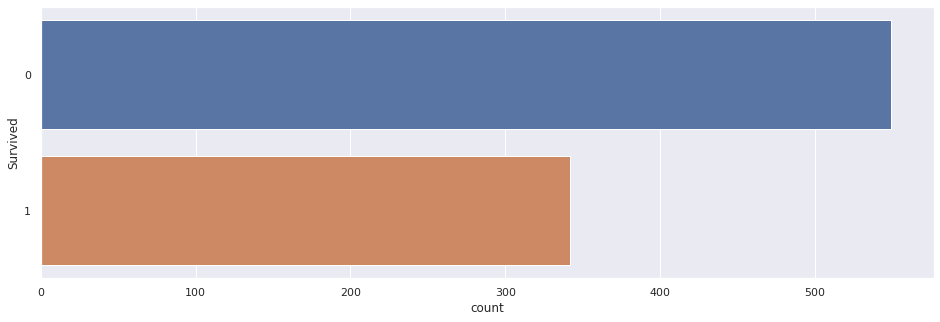

In [14]:
sns.countplot(y=df_train['Survived'])
plt.show()

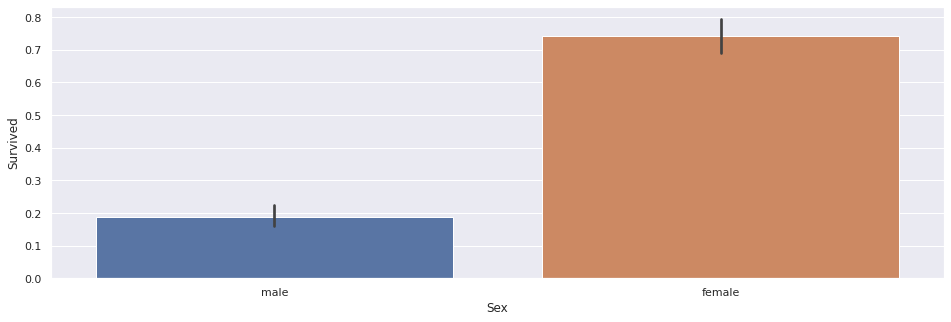

In [15]:
sns.barplot(x='Sex', y='Survived', data=df_train)
plt.show()

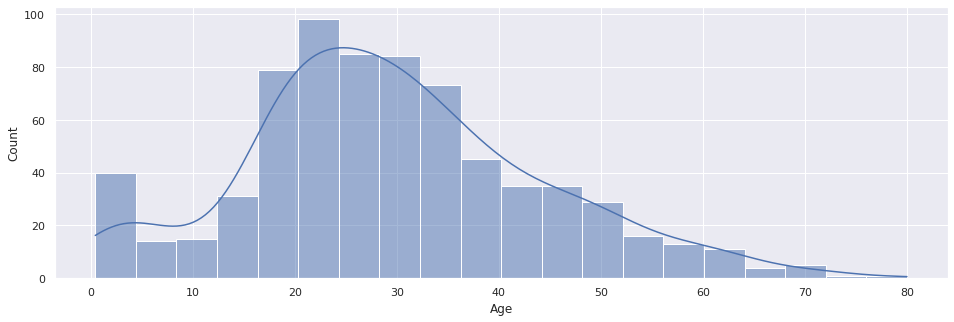

In [16]:
sns.histplot(x = df_train['Age'], kde= True)
plt.show()

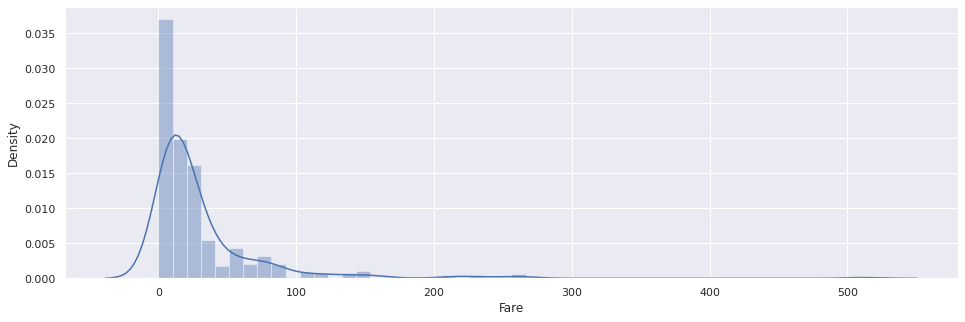

In [17]:
sns.distplot(df_train['Fare'])
plt.show()

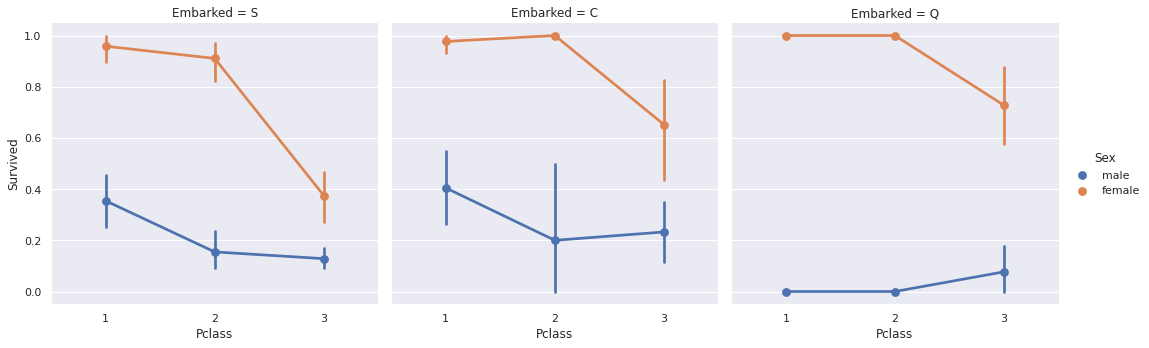

In [18]:
sns.factorplot('Pclass','Survived',hue='Sex',col='Embarked',data=df_train)
plt.show()

## 4. Preprocessing

In [19]:
print("Before", df.shape )

df = df.drop(['Ticket', 'PassengerId','Survived','Cabin'], axis=1)

print("After", df.shape)

Before (1309, 12)
After (1309, 8)


In [20]:
# Making Title

df['Title'] = df['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]
df.drop(['Name'],axis=1,inplace=True)
df.Title.value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: Title, dtype: int64

In [21]:
# Mapping Title

df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona','the Countess'], 'Rare')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')
df.Title.value_counts()

Mr        757
Miss      264
Mrs       198
Master     61
Rare       29
Name: Title, dtype: int64

In [22]:
#Filling missing titles

most_frequent_category=df['Title'].mode()[0]
df['Title'].fillna(most_frequent_category,inplace=True)

In [23]:
#Filling missing ages

median_age=df.Age.median()
df['Age'].fillna(median_age,inplace=True)

In [24]:
#Embarked values

df_train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [25]:
# Mapping Embarked

df['Embarked'].replace('S', 0,inplace=True)
df['Embarked'].replace('C', 1,inplace=True)
df['Embarked'].replace('Q', 2,inplace=True)

In [26]:
#Filling missing Embarked

most_frequent_category=df['Embarked'].mode()[0]
df['Embarked'].fillna(most_frequent_category,inplace=True)

In [27]:
# Mapping Sex

df['Sex'].replace('female', 0,inplace=True)
df['Sex'].replace('male', 1,inplace=True)

In [28]:
#Filling missing fare

median_fare=df.Fare.median()
df['Fare'].fillna(median_fare,inplace=True)

In [29]:
# Mapping fare

df.loc[ df['Fare'] <= 7.91, 'Fare'] = 0
df.loc[(df['Fare'] > 7.91) & (df['Fare'] <= 14.454), 'Fare'] = 1
df.loc[(df['Fare'] > 14.454) & (df['Fare'] <= 31), 'Fare']  = 2
df.loc[ df['Fare'] > 31, 'Fare'] = 3
df['Fare'] = df['Fare'].astype(int)


In [30]:
df.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Title       0
dtype: int64

In [31]:
df = pd.get_dummies(df)

In [32]:
df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,3,1,22.0,1,0,0,0.0,0,0,1,0,0
1,1,0,38.0,1,0,3,1.0,0,0,0,1,0
2,3,0,26.0,0,0,1,0.0,0,1,0,0,0
3,1,0,35.0,1,0,3,0.0,0,0,0,1,0
4,3,1,35.0,0,0,1,0.0,0,0,1,0,0


## 5. Model building

In [33]:
y = df_train['Survived']
X = df[:len(df_train)]
test = df[len(df_train):]

print(f'Shape X_train = {X.shape}')
print(f'Shape y = {y.shape}')
print(f'Shape test = {test.shape}')

Shape X_train = (891, 12)
Shape y = (891,)
Shape test = (418, 12)


### 5.1 Split

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 18)

### 5.2 Gaussian Naive Bayes

In [35]:
gnb = GaussianNB()
cv = cross_val_score(gnb,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.74626866 0.76865672 0.81343284 0.83458647 0.81203008]
0.7949949500617215


### 5.3 LogisticRegression

In [36]:
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.75373134 0.81343284 0.81343284 0.84210526 0.81203008]
0.8069464706542474


### 5.4 DecisionTreeClassifier

In [37]:
dt = tree.DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.7238806  0.76119403 0.73880597 0.78195489 0.7593985 ]
0.7530467960947144


### 5.5 KNeighborsClassifier

In [38]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.70895522 0.70895522 0.75373134 0.73684211 0.78947368]
0.7395915161036921


### 5.6 RandomForestClassifier

In [39]:
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.71641791 0.75373134 0.7761194  0.81954887 0.79699248]
0.7725620020199753


### 5.7 Support Vector Classification

In [40]:
svc = SVC(probability = True)
cv = cross_val_score(svc,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.63432836 0.58208955 0.64925373 0.61654135 0.63157895]
0.6227583885085849


### 5.8 XGBClassifier

In [41]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state =1)
cv = cross_val_score(xgb,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.73880597 0.79850746 0.79104478 0.81954887 0.80451128]
0.7904836718662327


### 5.9 VotingClassifier

In [42]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators = [('lr',lr),('knn',knn),('rf',rf),('gnb',gnb),('svc',svc),('xgb',xgb)], voting = 'soft') 

In [43]:
cv = cross_val_score(voting_clf,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.76119403 0.81343284 0.82835821 0.84210526 0.81954887]
0.8129278419930422


In [44]:
voting_clf.fit(X_train,y_train)
y_pred = voting_clf.predict(test)
y_pred.shape

(418,)

## 6. Submission 


In [45]:
submission = pd.DataFrame({
    "PassengerId":df_test["PassengerId"],
    "Survived":y_pred
})
submission.head()


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [46]:
submission.to_csv("submission.csv",index=False)

## 7. Acknowledgements



kernel by OLEKSANDR KOSOVAN : https://www.kaggle.com/code/kosovanolexandr/kickstarter-lgbmclassifier-0-681

kernel by ARUN KR. KHATTRI : https://www.kaggle.com/code/arunkhattri/pythonic-story-of-titanic

kernel by KEN JJEE : https://www.kaggle.com/code/kenjee/titanic-project-example